<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/binary_category_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification



#Import

In [ ]:
import tensorflow
from keras import models, layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt


##Dataset

In [ ]:
# DATASET AND PREPROCESSING - IMDB collections of movie reviews classified with bad/good sentiment labels


def vectorize_sequences(sequences, dimension=10000):
  """
  Encoding integer sequences into binary matrix
  """

  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
                                                                num_words=10000)

# Encoding data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encoding categories
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Devide train dataset for validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


17464789/17464789 [==============================] - 0s 0us/step


##Model

In [ ]:
# MODEL DEFINITION - this model should predict sentiment of a review

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##Training

In [ ]:
# TRAIN

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 124ms/step - loss: 0.5232 - accuracy: 0.7379 - val_loss: 0.4393 - val_accuracy: 0.8037
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.3045 - accuracy: 0.8841 - val_loss: 0.2957 - val_accuracy: 0.8788
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2300 - accuracy: 0.9140 - val_loss: 0.2686 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1764 - accuracy: 0.9333 - val_loss: 0.3136 - val_accuracy: 0.8757
Epoch 5/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1404 - accuracy: 0.9500 - val_loss: 0.3174 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1128 - accuracy: 0.9603 - val_loss: 0.3447 - val_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0814 - accuracy: 0.9707 - val_loss: 0.3961 - val_accuracy: 0.8732
Epoch 8/20
3

## Results

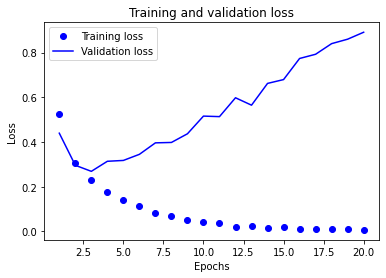

In [ ]:
# LOG LOSS RESULTS

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

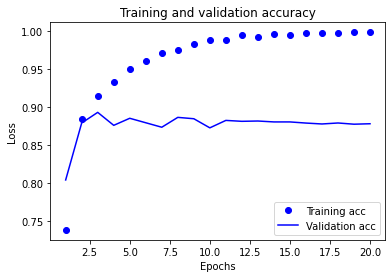

In [ ]:
# LOG VALIDATION RESULTS

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# EVALUATION

score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)

782/782 [==============================] - 3s 4ms/step - loss: 0.9799 - accuracy: 0.8653
['loss', 'accuracy']
[0.9798890352249146, 0.8653200268745422]
